__Exercise 3__

In [88]:
import networkx as nx
import matplotlib.pyplot as plt
#from numpy  import *
import numpy as np
import random as rand

__Random Walks__ performing routines
- __random\_walk\_comp__: _the first routine uses the advantages of automatic computation to calculate the number of visits each node receives (visits) in a walk of lenght l._ 
- __random\_walk\_math__: the second routine uses the mathematical afdjvantages to calculate the number of visits to each node in a random walk of lenght l based on matrix multiplication.

In [91]:
def random_walk(G,l):
    nv = np.zeros(len(G.nodes)+1) # visits counter for each node
    for node in G.nodes:
        exit = False
        num_steps = l
        pos = node
        while(not exit and num_steps > 0):
            neighbors = list(G.neighbors(pos))
            if(len(neighbors) > 0):
                next_node = neighbors[rand.randint(0,len(neighbors)-1)]
                nv[next_node] += 1 # visit counting
                pos = next_node
                num_steps -= 1 
            else:
                exit = True
                
    return nv

In [4]:
def random_walk_math(G,l):
    #https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_power.html
    M = nx.to_numpy_matrix(G)
    M_walks = np.linalg.matrix_power(M,l)
    return M_walks

___Les_ _Miserables_ network__: Setting working directory and importing  network.

In [1]:
# setting up working directory
import os
os.chdir('/home/vitor/Grad/Sem/8/Redes_Complexas/');

In [93]:
# reading txt
G_lm = nx.read_edgelist('data/lesmis.txt', nodetype=int, data=(('weight',float),),create_using= nx.DiGraph())

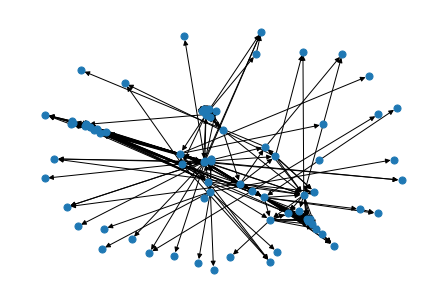

In [94]:
# printing network
def net_print(N):
    nx.draw(N, with_labels = False, node_size=50, font_size= 16)
    plt.show(True)
net_print(G_lm)

__Performing random walk__ in the network

In [96]:
visits = random_walk(G_lm,3)
print(visits)

[ 0.  0.  1.  1.  3.  0.  0.  0.  0.  0.  0.  3.  0.  1.  0.  0.  0.  0.
  1.  0.  0.  1.  2.  4.  7.  1.  0.  1.  0.  0.  2.  1.  3.  0.  0.  1.
  0.  2.  3.  6.  0.  0.  0.  1.  0.  1.  1.  0.  0.  2.  0.  0.  1.  1.
  0.  1.  7.  0.  0.  2.  2.  0.  3.  1.  3.  4.  4.  6.  0.  2.  1.  2.
  2.  1.  0.  1.  8. 10.]


__Correlating__ node's degrees and random walk results

/home/vitor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


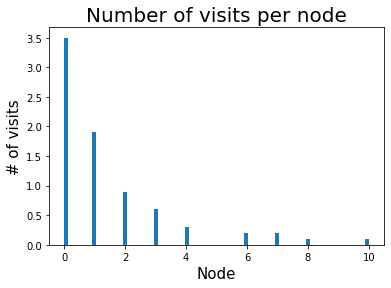

In [98]:
# ploting visits
plt.figure()
plt.hist(visits, bins  = len(visits), normed=True)
plt.title("Number of visits per node", fontsize=20)
plt.ylabel("# of visits", fontsize=15)
plt.xlabel("Node", fontsize=15)
#plt.grid(True)
plt.savefig('visits.eps') #save the figure into a file
plt.show()

In [101]:
# getting degrees
vk = dict(G_lm.degree())
vk = list(vk.values())
degree = np.array(vk)
print('Degree', degree)

Degree [ 1 10  3  3  1  1  1  1  1  1 36  1  2  1  1  1 15 11 16 11 17  4  8  4
  1  2  6  6  6  6  6  3  2 22  7  7 19 15 13 10 10 10  9  3  7  9  7  7
  7  7  7  2 11  3  2  3  1  7  4  1  2 11 13  2  1 11  9 11 12 12 10  2
  2  7  2  1  1]


/home/vitor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


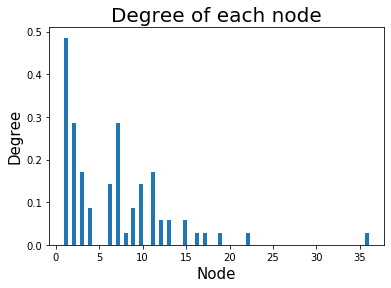

In [103]:
# ploting degrees
plt.figure()
plt.hist(degree, bins  = len(degree), normed=True)
plt.title("Degree of each node", fontsize=20)
plt.ylabel("Degree", fontsize=15)
plt.xlabel("Node", fontsize=15)
#plt.grid(True)
plt.savefig('degree.eps') #save the figure into a file
plt.show()

__Conclusão:__ Pelas duas plotagens acima podemos ver que o grau de cada nó está diretamente relacionado ao número de visitas que o mesmo recebe - mesmo para uma caminhada curta como a do exemplo. Esse comportamento já era esperado, visto que quanto maior o grau de um nó maior será a chando mesmo ser percorrido durante uma caminhada aleatória.